#Generate synthetic data using the equation you used and plot using 4d plot

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 1275.0114 - val_loss: 1600.3458
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 1254.6106 - val_loss: 1573.4999
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 1229.8105 - val_loss: 1540.1188
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 1198.6022 - val_loss: 1498.7716
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 1160.8619 - val_loss: 1445.1249
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 1112.0844 - val_loss: 1385.0619
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 1059.2616 - val_loss: 1310.1338
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 994.1636 - val_loss: 1228.2906
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 921.9752 - val_loss: 1139.9940
Epoch 10/100
25/25 [==============================] - 0s

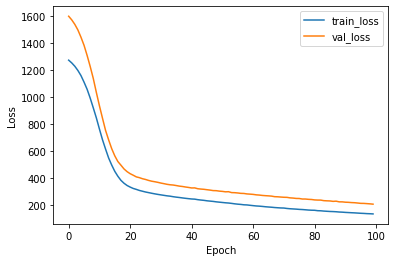

7/7 [==============================] - 0s 2ms/step


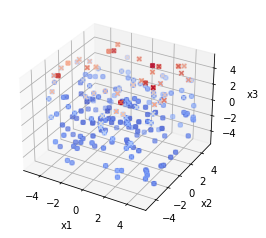

In [3]:
import numpy as np
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Generate synthetic data
n = 1000
x = np.random.uniform(-5, 5, size=(n, 4))
y = np.sin(x[:, 0]) + x[:, 1]**2 + np.exp(x[:, 2]) + np.cos(x[:, 3])

# Split data into train and test sets
x_train, x_test = x[:800], x[800:]
y_train, y_test = y[:800], y[800:]

# Build the neural network
inputs = tf.keras.Input(shape=(4,))
hidden1 = tf.keras.layers.Dense(10, activation='relu')(inputs)
hidden2 = tf.keras.layers.Dense(10, activation='relu')(hidden1)
outputs = tf.keras.layers.Dense(1)(hidden2)

# Define the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generate predictions
y_pred = model.predict(x_test)

# Plot the predictions against the true values in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_test[:, 0], x_test[:, 1], x_test[:, 2], c=y_test, cmap='coolwarm')
ax.scatter(x_test[:, 0], x_test[:, 1], x_test[:, 2], c=y_pred, marker='x', cmap='coolwarm')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.show()
